
## Logistic Regression
### Linear Regression 연장선상의 Classification 타입 Supervised Learning 모델
*** scikit-learn 라이브러리를 이용한 Logistic Regression***

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

# notebook에 직접 그래프를 plot  
%matplotlib inline

In [2]:
# 'Default' 데이터 Load  
Default = pd.read_excel('../Data/Default.xlsx')

## 탐색 자료 분석 
#### 다음은 R의 ISLR 패키지에 있는 "Default" 데이터에 관한 설명
#### Description

고객 정보를 담은 모의 데이터로 만 명의 고객 정보를 학습해 모델을 만들어 향후 누가 채무불이행을 할 지를 예측하기 위함. 

A simulated data set containing information on ten thousand customers. The aim here is to predict which customers will default on their credit card debt.

#### Format

A data frame with 10000 observations on the following 4 variables.

***default (채무 불이행: 불이행(Yes), 이행(No) )***

A factor with levels No and Yes indicating whether the customer defaulted on their debt

***student (학생: Yes가 학생)***

A factor with levels No and Yes indicating whether the customer is a student

***balance (잔고)***

The average balance that the customer has remaining on their credit card after making their monthly payment

***income (수입)***

Income of customer

In [3]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.5+ KB


In [4]:
Default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [5]:
Default.describe(include='all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462903
50%,NaN,NaN,823.636973,34552.644802
75%,NaN,NaN,1166.308386,43807.729272


In [6]:
Default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

- 'default' column의 element가 총 10000개 인데 unique한 값이 'No', 'Yes' 2개이고, 'No'가 9667개. 즉, 앞도적으로 'default' **하지 않은** 사람이 많음
- default가 "Yes" 로 default한 사람은 333명.  default (채무불이행) 한 사람은 전체 10000 명 중 3.3% 밖에 안됨
- 이처럼 classification 을 할 때 'No'처럼 어느 한 label/class의 sample수가 압도적으로 많거나/작아 다른 class의 sample 수와 균형이 맞지 않을 때 이 상황을 **class imbalance** 를 보인다 함

In [7]:
Default.student.value_counts()              

No     7056
Yes    2944
Name: student, dtype: int64

- 학생이 약 30%

In [8]:
pd.crosstab(Default.student, Default.default)

default,No,Yes
student,,
No,6850,206
Yes,2817,127


***10000명 전체의 balance 평균이 835인데 default한 사람과 안한 사람에 따라 balance가 다를까? ***

In [9]:
Default.balance.groupby(by=Default['default']).mean()

default
No      803.94375
Yes    1747.82169
Name: balance, dtype: float64

- 다르다. Deault한 사람의 평균잔고는 1747, 안한 사람은 803으로 차이가 큼

In [10]:
# default 한 집단과 안한 집단에 따른 'balance'의 statistics를 자세히 보자 
Default.balance.groupby(by=Default['default']).describe()

default       
No       count    9667.000000
         mean      803.943750
         std       456.476236
         min         0.000000
         25%       465.714646
         50%       802.857102
         75%      1128.248851
         max      2391.007739
Yes      count     333.000000
         mean     1747.821690
         std       341.266808
         min       652.397134
         25%      1511.610952
         50%      1789.093391
         75%      1988.869747
         max      2654.322576
Name: balance, dtype: float64

In [11]:
# default 한 집단과 안한 집단에 따른 'income'의 statistics;
Default.income.groupby(by=Default['default']).describe()

default       
No       count     9667.000000
         mean     33566.166625
         std      13318.251249
         min        771.967729
         25%      21405.060662
         50%      34589.488060
         75%      43823.756308
         max      73554.233495
Yes      count      333.000000
         mean     32089.147124
         std      13804.221110
         min       9663.788159
         25%      19027.508633
         50%      31515.344493
         75%      43067.333736
         max      66466.460891
Name: income, dtype: float64

앞의 내용을 책과 같이 예쁘게 보이려면,

### [seaborn](http://seaborn.pydata.org/) 그래픽 라이브러리 사용하여 

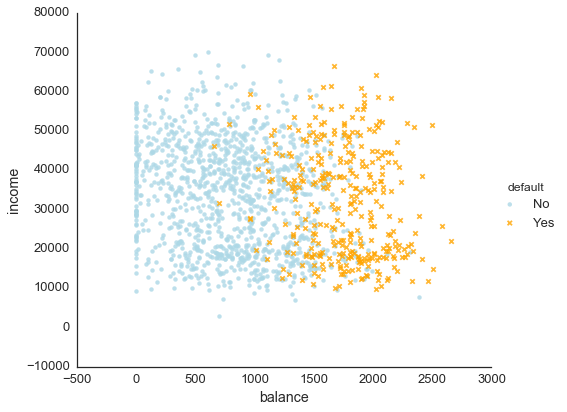

In [12]:
# Take just 1200 samples from default=='No' and all from default='Yes'   
some_of_No = pd.concat([ Default.loc[Default.default == 'No', :].sample(n=1200),  
                        Default.loc[Default.default == 'Yes', :] ], axis=0 )

sns.set(style='white', font_scale=1.3)
def_palette = {'No':'lightblue', 'Yes':'orange'}

sns.lmplot('balance', 'income', data=some_of_No, hue='default', fit_reg=False, 
           markers=['o', 'x'], size=6, aspect=1.2, palette=def_palette)

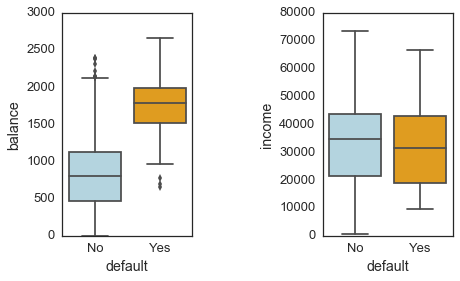

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.subplots_adjust(wspace=1)

sns.boxplot('default', 'balance', data=Default, orient='v', ax=ax1, palette=def_palette)
sns.boxplot('default', 'income', data=Default, orient='v', ax=ax2, palette=def_palette)

# 4.3 Logistic Regression

<img src="../Figures/logistic_regression.PNG" width="250" />

### Maximum Liklihood Estimation (MLE) 방법을 사용해 $\beta_0, \beta_1$을 구한다.  
- Linear Regression의 OLS도 MLE의 한 가지  

### 카테고리 변수들을 dummy variable을 사용해 encoding 

In [14]:
Default_enc = pd.get_dummies(Default, drop_first=True)
Default_enc.head()

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0.0,0.0
2,817.180407,12106.134700,0.0,1.0
3,1073.549164,31767.138947,0.0,0.0
4,529.250605,35704.493935,0.0,0.0
5,785.655883,38463.495879,0.0,0.0


- 'default' 경우에 default_Yes 가 1
- 'student' 일 경우에 student_Yes 가 1

In [15]:
# import scikit-learn LogisticRegression estimator
from sklearn.linear_model import LogisticRegression

#### LogisticRegression Estimator를 instantiate할 때 설정할 수 있는 hyperparameter 가 많은데 그 중에 '[solver](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)'가 있음.  이는 최적화와 Regularization과 관여.  기본 설정은 ‘liblinear’ 로 데이터가 크지 않을 때 적합.  Response가 Multi-class 일 경우엔  ‘newton-cg’, ‘sag’, ‘lbfgs’ 중에 씀.
- 우리 경우엔 data set 크기가 작고, 또한 binary classification이기에 기본 세팅 'liblinear'가 적당하겠지만 ISLR의 경우는 'newton-cg'를 택한 것으로 보임 

In [16]:
# Instantiate the estimator with the solver 'newton-cg' 
logistic_reg = LogisticRegression(solver='newton-cg')

# Training set로 모든 observations을 사용.  Predictor로는 'balance' 
X = Default_enc.balance.reshape(-1, 1)  # LogisticRegression이 X를 2D로 인터페이스하기에 reshape하여 nx1 행렬로

# Response로는 Default_Yes 
y = Default_enc.default_Yes

In [17]:
# Fit the model 
logistic_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ',logistic_reg.coef_)          # Table 4.1

classes:  [ 0.  1.]
intercept : [-10.65132269]
coefficient:  [[ 0.00549891]]


### 4.3.3  예측
- Logistic Regression은 Classification에 사용하기에 Response의 클래스(카테고리)를 추정.
- 하지만, ISLR에 잘 설명되어 있듯이 Logistic Regression을 포함한 대부분의 Classifier는 Response의 클래스(카테고리)를 추정할 때 내부적으론 실수 값 확률을 보고 판단한다. Logistic Regression의 경우엔 Logistic 함수의 출력인 (0, 1) 사이의 확률을 보고 **기본적으로** 0.5이상이면 1, 이하이면 0 으로 클래스를 결정한다.       

***balance가 1000 ,  2000일 때 'default'할 확률***

In [19]:
X_new = np.array([1000, 2000]).reshape(-1,1)
logistic_reg.predict_proba(X_new)  # logistic regression estimator에게 response를 확률로 요청  

array([[ 0.99424784,  0.00575216],
       [ 0.41423102,  0.58576898]])

- ([[ 0.99424784,  0.00575216],   :   predictor 값 1000 에 대해 response가 (0 일 확률, 1 일 확률)      
- ([ 0.41423102,  0.58576898]])

In [20]:
# 추정한 response를 클래스로 달라고 요청.  Threshold는 0.5로 했음 
logistic_reg.predict(X_new)

array([ 0.,  1.])

***Table 4.2  카테고리 변수 'student_Yes'를 predictor로***

In [21]:
logistic_reg = LogisticRegression(solver='newton-cg')  
X = Default_enc.student_Yes.reshape(-1, 1)
y = Default_enc.default_Yes
logistic_reg.fit(X, y)
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ',logistic_reg.coef_)

classes:  [ 0.  1.]
intercept : [-3.50213151]
coefficient:  [[ 0.39959759]]


- ISLR의 Table 4.2의 coefficient와 약간 다름. scikit-learn의 logistic regression estimator가 R의 경우와 다른 opitimzation 및 regularization 방법을 쓰지 않나 생각됨
- 학생에 대응되는 coefficient가 0.39로 positive. 즉, 학생이면 default할 가능성이 높아진다.

***앞의 모델을 활용해 학생일 때와 아닐 때의 default를 예측***

In [22]:
X_new = np.array([1, 0]).reshape(-1,1)
logistic_reg.predict_proba(X_new)

array([[ 0.95699715,  0.04300285],
       [ 0.97074836,  0.02925164]])

- predictor로 '학생'인가, 아닌가 정보만 주면 두 경우 모두 (학습한) 모델은 'default' No 를 예측.  이런 예측은 당연히 예상되는데 기본적으로 학생이거나 아니거나 관계없이 대부분 'default' 하지 않음. 
- 그러나, 학생일 때 default 확률이 0.043으로 학생이 아닐 때의 0.029 보다 조금 더 높아지긴 했음 

## 4.3.4 Multiple Logistic Regression

In [23]:
Default_enc.head(3)

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0.0,0.0
2,817.180407,12106.134700,0.0,1.0
3,1073.549164,31767.138947,0.0,0.0


In [24]:
X = Default_enc.loc[:, ['balance', 'income', 'student_Yes']]
X['income'] = X['income']*0.001
y = Default_enc.default_Yes

In [25]:
X.head()

,balance,income,student_Yes
1,729.526495,44.361625,0.0
2,817.180407,12.106135,1.0
3,1073.549164,31.767139,0.0
4,529.250605,35.704494,0.0
5,785.655883,38.463496,0.0


In [26]:
logistic_reg.fit(X, y)
print('classes: ',logistic_reg.classes_)
print('intercept :', logistic_reg.intercept_)
print('coefficient: ')
list(zip(X.columns, logistic_reg.coef_[0]) )        # ISLR Table 4.3

classes:  [ 0.  1.]
intercept : [-10.90180126]
coefficient: 


[('balance', 0.0057306060794021958),
 ('income', 0.0039616418253412486),
 ('student_Yes', -0.61257019325072248)]

- ISLR Table 4.3 과 조금 다름.  scikit-learn Logistic Regression은 R 경우와 다른 optimization과 regularization을 실행. 둘 다 맞음  
- 'student_Yes'의 coefficient가 음수 --> 학생이면 default할 가능성이 적어짐 

***Prediction:  ISLR (4.8) & (4.9) ***

In [27]:
X_new = np.array([[1500, 40, 1],    # balance 1500, income 40, student
                  [1500, 40, 0]])   # balance 1500, income 40, non-student
logistic_reg.predict_proba(X_new)

array([[ 0.94047545,  0.05952455],
       [ 0.89542804,  0.10457196]])

- 학생이 아닌 경우 'default' 확률이 0.0595에서 0.1로 증가

### 4.3.5.  Logistic Regression for  >2 Response Classes
- scikit-learn의 Logistic Regression estimator가 지원함 

### statsmodels 라이브러리의 [Logistic Regression](http://statsmodels.sourceforge.net/0.6.0/discretemod.html)을 써 Logistic Regression 할 수 있음.  실습은 뒤에.

## 4.6 Lab: Logistic Regression
### 4.6.1 The Stock Market Data

In [28]:
Smarket = pd.read_csv('../Data/Smarket.csv', index_col=0)
Smarket.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1250,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [29]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [30]:
Smarket.shape

(1250, 9)

In [31]:
Smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


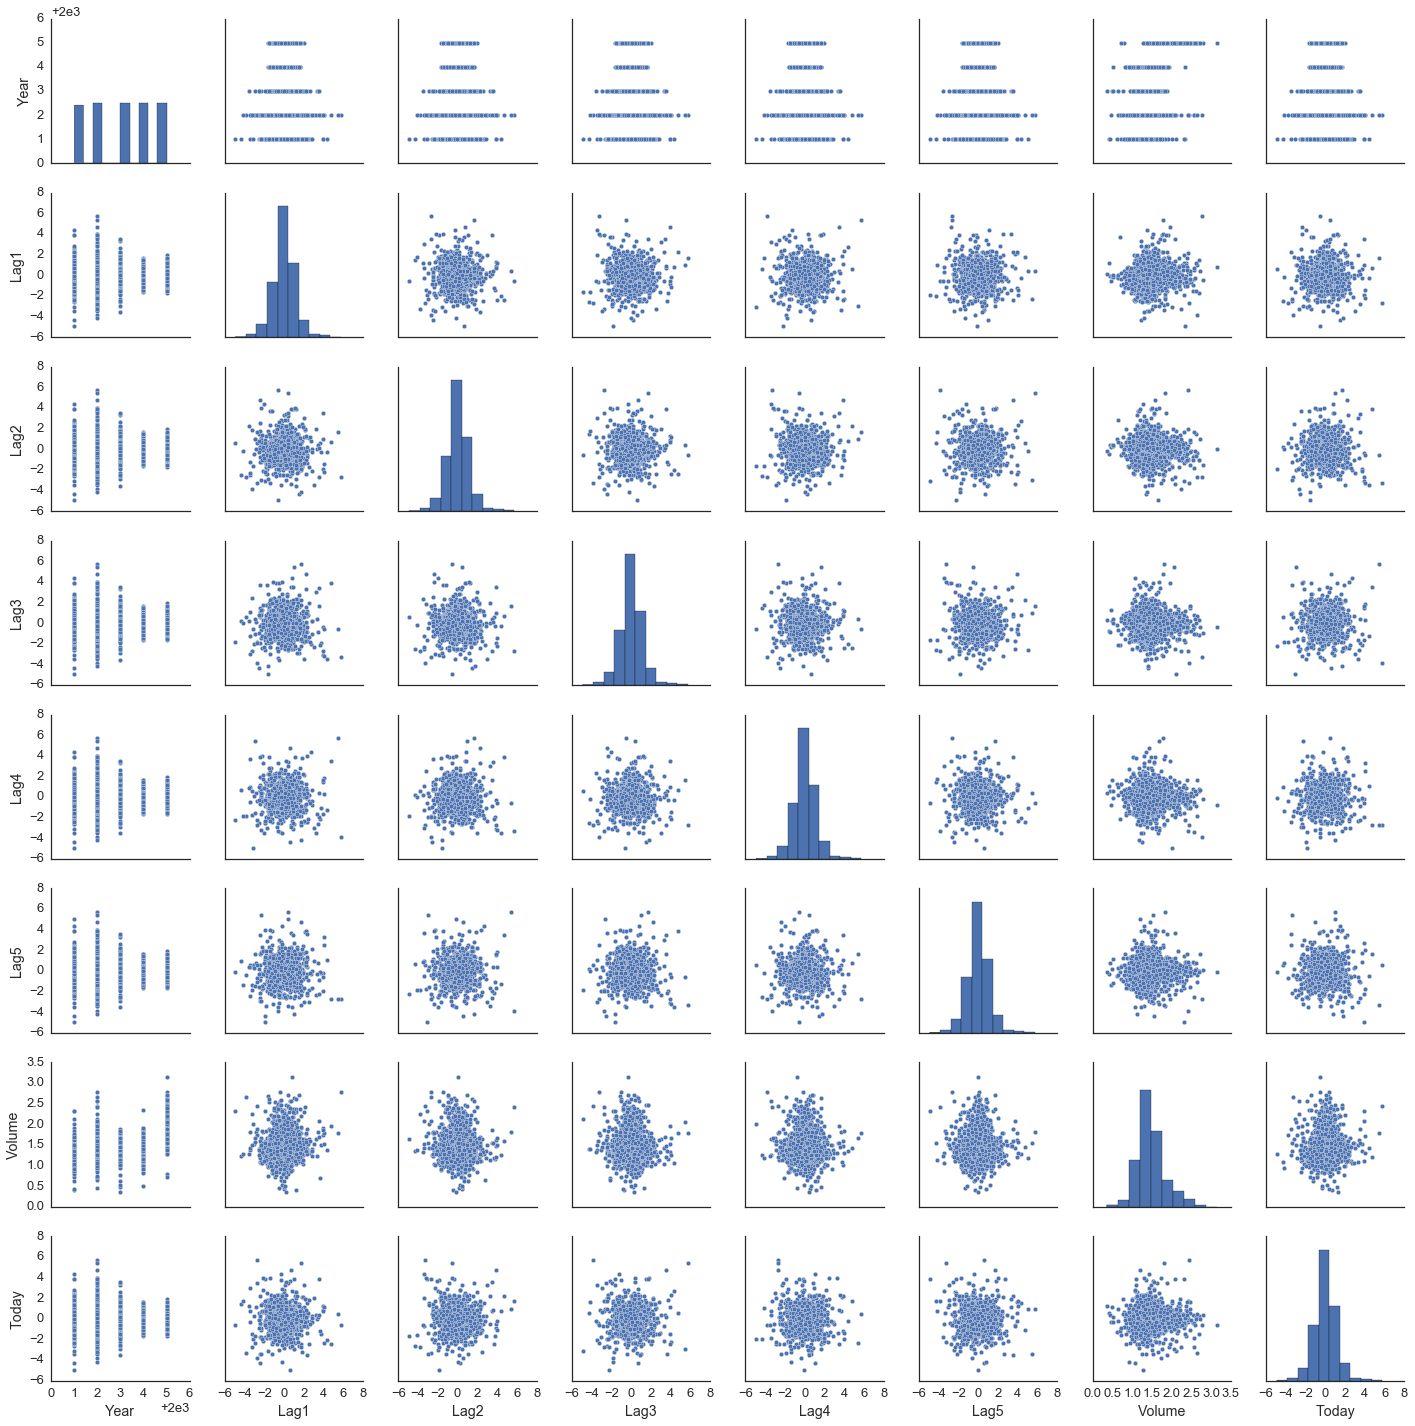

In [32]:
sns.pairplot(Smarket)

In [33]:
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 92.8+ KB


In [34]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


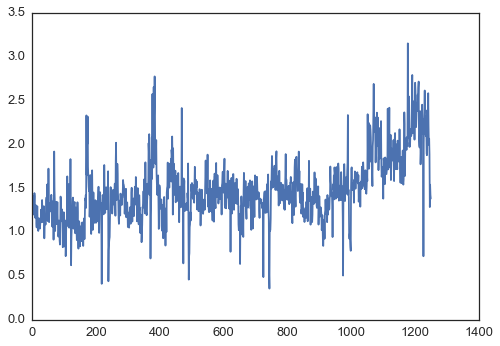

In [35]:
plt.plot(Smarket.Volume)

(-50, 1400.0)

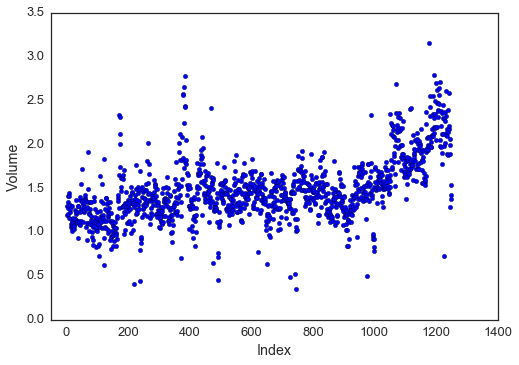

In [36]:
plt.scatter(x=Smarket.index, y=Smarket.Volume) 
plt.xlabel('Index')
plt.ylabel("Volume")
plt.xlim(xmin=-50)

### 4.6.2 Logistic Regression

In [37]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


'Direction' column을 dummy encoding

In [38]:
Smarket_enc = pd.get_dummies(Smarket, drop_first=True)
Smarket_enc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1.0
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1.0
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0.0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1.0
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1.0


- Smarket의 'Direction' feature의 'Up' 을 1로 encoding 하였다.  

LogisticRegression estimator를 instantiate 하고 fit

In [39]:
X = Smarket_enc.loc[:, 'Lag1':'Volume']
y = Smarket_enc.Direction_Up
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
print("Intercept:", logreg.intercept_)
list(zip(X.columns, logreg.coef_[0]) )         # coefficients

Intercept: [-0.12107884]


[('Lag1', -0.072843823327611426),
 ('Lag2', -0.042235274433928667),
 ('Lag3', 0.011016099836884528),
 ('Lag4', 0.0092836366510768605),
 ('Lag5', 0.010263449074427951),
 ('Volume', 0.13210836866756195)]

### Traning Performance : Training에 사용했던 데이터를 이용해 response 추정을 확률로  

In [41]:
list( zip(X.index, logreg.predict_proba(X=X)[:10, 1]) )    # 첫 10개 

[(1, 0.50734370464863032),
 (2, 0.48174499259329334),
 (3, 0.48129808387853862),
 (4, 0.51534948997369356),
 (5, 0.51099139985928388),
 (6, 0.50706470383033142),
 (7, 0.49274928196958434),
 (8, 0.50927901751826765),
 (9, 0.51783316122317091),
 (10, 0.48909461174678892)]

- 이 즈음에서 중요한 일을 다 한 셈이다. 나머지는 위의 확률을 thresholding 해 클래스 래이블을 결정하는 것

### thresholding을 0.5에서 하는 predict() 메소드를 써 Up(1)을 몇 개 예측했나 봄

In [42]:
y_pred_class = logreg.predict(X=X)
y_pred_class.sum()

965.0

#### 실제 y와 예측치/추정치가 몇 개나 일치하는 지 봄

In [43]:
(y == y_pred_class).sum()    # ISLR 과 1개 차이 -> 위에서 언급한 'solver' 영향  

651

정확도(Accuracy)

In [44]:
(y == y_pred_class).mean()

0.52080000000000004

**간단한 분석 :** 모델을 학습시킬 때 사용했던 training set를 주어 추정을 한 정확도가 52% 정도이다. 그런데, 아래와 같이 원래 데이터의 'Direction'의 분포를 보니 전체 1250일 중에 648일이 'Up' 으로 'Down'인 602일 보다 많다. 따라서, 이 것만 보고 아예 예측을 항상 'Up' 이라고만 해도 정확성이 648/1250 -> 51.84%가 나온다. 즉, Null model의 baseline 정확도가 51.84% 다. 이 점을 고려하면, 위 logistic regression 모델의 training 성능의 정확성 0.5208 은 거의 baseline과 차이가 없다. 모델이 전혀 학습을 못했거나, 데이터 자체에 정보가 없는 것이다.   

In [45]:
Smarket.Direction.value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

## Confusion Matrix를 사용한 Classification 모델 평가
- 위의 예와 같이 'Up', 'Down' 두 클래스만 있는 Binary Classifier의 평가에 Confusion Matrix와 이를 이용한 여러 성능/에러 지표(metric), ROC, AUC 가 자주 사용됨

### Confusion Matrix를 포함한 Classification/Regression 모델의 평가, 선정은 별도 Jupyter Notebook에 더 상세히 제공할 것임

모델을 training 할 때 사용한 데이터를 갖고 구한 성능치 (Performance Metric)을 보고는 모델이 새로운 데이터에 대해서 generalize 잘 해 좋은 성능을 보일 지 확신하지 못한다는 말을 여러번 했음.  Training data만을 이용해 그에 맞춘 모델은 high variance 모델일 가능성이 많아, 그 training data에서만 잘 하고, 그 training data가 갖고 있을 수 있는 노이즈에 맞추고, 노이즈를 신호라고 생각하고 외어 버림.   

**Training/Test Split** : 따라서, (학습이 끝난) 모델을 평가할 때에 학습에 쓰이지 않았던 데이터로 해야 함이 기본 생각. ISLR에서 Smarket 데이터는 2001년부터 2005년 까지의 데이터. 그래서 우리 생각은 2001~2004년 데이터 만으로 모델을 traning 시키고, 제외했던 (held-out) 2005년 것을 test data로 삼아 모델을 평가.

In [46]:
train_filter = Smarket_enc.Year < 2005
# train_filter.value_counts()

X_train = Smarket_enc.loc[train_filter, 'Lag1':'Volume']
y_train = Smarket_enc.loc[train_filter, 'Direction_Up']

X_test = Smarket_enc.loc[~train_filter, 'Lag1':'Volume']
y_test = Smarket_enc.loc[~train_filter, 'Direction_Up']

logreg.fit(X_train, y_train)     # 모델을 Train Set으로 훈련  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
# Test the model with the Test Set and get the estimated responses in probability 
y_test_pred_prob = logreg.predict_proba(X=X_test)
y_test_pred_prob[:5]    # [ 0.47268383,  0.52731617] -> [ prob_of_0,  prob_of_1 ] 

array([[ 0.47268383,  0.52731617],
       [ 0.48411655,  0.51588345],
       [ 0.4768594 ,  0.5231406 ],
       [ 0.48564818,  0.51435182],
       [ 0.50140487,  0.49859513]])

In [48]:
y_test_pred_class = logreg.predict(X=X_test)
y_test_pred_class[:5]

array([ 1.,  1.,  1.,  1.,  0.])

In [49]:
# 물론 ISLR에서와 같이 확률로 부터 thresholding해 구할 수도 있음
[ 1 if prob>0.5 else 0 for prob in y_test_pred_prob[:, 1] ][:5]   # 첫 5개 

[1, 1, 1, 1, 0]

## [scikit-learn metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) 모듈을 활용한 Classifier 성능 분석 


In [50]:
# import estimator metrics 
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred_class))   # Test Set accuracy 

Accuracy:  0.484126984127


- test set 정확도(Accuracy)가 baseline보다 낮고, 무작위로 찍을 경우인 50% 보다도 낮음. 
- 예측 response가 실제 response (True response)를 얼마나 맞춘 가를 따지는 Accuracy는 classifier의 보다 심도있는 평가에는 부족한 점이 많다. (가령, training set 에 100개 샘플이 있는데 그 중 Up이 98, Down이 2개이다. 이 땐 baseline 기본만 하는 classifier는 항상 'Up' 이라고 할 것이다. 만약, test set의 Up, Down 분포가 training set 분포와 어느 정도 비슷하다면 이 baseline classifier의 accuracy는 대략 0,98 (98%) 정도일 가능성이 많다. 매우 좋은 숫자다. 그렇지만 이 classifier는 'Up'을 하나도 예측하지 못했다.  

### Confusion Matrix : 
- Classifier의 보다 다양한 성능과 특성을 분석하기 좋은 도구(표)  

<img src="../Figures/Confusion_Matrix_Explained.PNG" width="1250" />

In [51]:
# scikit-learn이 제공하는 것 이용.  물론 직접할 수도 있음 
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_class)   # 위 그림 참조  
print(conf_mat)

[[74 37]
 [93 48]]


In [52]:
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_class, labels=[1,0])   # 'labels' argument 지정 
print(conf_mat)

[[48 93]
 [37 74]]


- labels를 argument로 주면 label순으로 배열 

In [53]:
(conf_mat[0,0] + conf_mat[1,1]) /conf_mat.sum()   # confusion matrix에서 Accuracy 계산 
# print(metrics.classification_report(y_test, y_test_pred_class , digits=4))

0.48412698412698413

### statsmodels 라이브러리 활용한 Logistic Regression

### [Statsmodels GLM](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html) : R 스타일로도 가능

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Smarket 데이터를 읽어드릴 때 'Year' column을 날짜로 인식시킬 수도 있음. 시계열(Time Series) 처리할 때 유용

In [55]:
Smarket = pd.read_csv('../Data/Smarket.csv', index_col=0, parse_dates=True)
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 92.8+ KB



#### Logistic Regression임을 'family=sm.families.Binomial()' 으로 알려 줌
- statsmodels 는 카테고리 변수의 preprocessing을 내부에서 자체 처리. 

In [56]:
logreg_stats = smf.glm(formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', 
                       data=Smarket, family=sm.families.Binomial()).fit()
logreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sat, 29 Oct 2016   Deviance:                       1727.6
Time:                                          00:19:23   Pearson chi2:                 1.25e+03
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601        -0.346     0.598
Lag1           0.0731      0.050      1.457      0.145        -0.025     0.171
Lag2           0.0423      0.050      0.845      0.398        -0.056     0.140
Lag3          -0.0111      0.050     -0.222      0.824        -0.109     0.087
Lag4          -0.0094      0.050     -0.187      0.851        -0.107     0.089
Lag5          -0.0103      0.050     -0.208      0.835        -0.107     0.087
Volume        -0.1354      0.158     -0.855      0.392        -0.446     0.175
==============================================================================
"""

- coefficient들을 보니 ISLR 책의 것과 부호가 반대임을 볼 수 있음.  즉, 이 모델은 ISLR의 R과 반대로, Direction이 'Down' 이면 1, 'Up' 이면 0 으로 dummy coding 하였음을 알 수 있다.  이를 확인하기 위해 ***endogeneous (dependent) variable***을 출력해 원래 'Up', 'Down'과 비교하면,

In [57]:
print(logreg_stats.model.endog[:10])
print(Smarket.Direction.values[:10])
print("\n'Down' 이 1로 coding 되어 있음을 다시 확인하기 위해서 : 'Down'이 602개 이었으니")
print(Smarket.Direction.value_counts())
print('\nDowns : ', logreg_stats.model.endog.sum())

[ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.]
['Up' 'Up' 'Down' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Up']

'Down' 이 1로 coding 되어 있음을 다시 확인하기 위해서 : 'Down'이 602개 이었으니
Up      648
Down    602
Name: Direction, dtype: int64

Downs :  602.0


In [58]:
# fit 된 모델에게 새로운 predictor를 주지 않으면 training set 에 대한 response 의 확률를 준다
logreg_stats_pred_prob = logreg_stats.predict()
logreg_stats_pred_prob[:10]    # 'Down' 의 확률

array([ 0.49291587,  0.51853212,  0.51886117,  0.48477764,  0.48921884,
        0.49304354,  0.50734913,  0.49077084,  0.48238647,  0.51116222])

In [59]:
logreg_stats_pred_class = [('Up' if prob<0.5 else 'Down') for prob in logreg_stats_pred_prob ]
logreg_stats_pred_class[:5]

['Up', 'Down', 'Down', 'Up', 'Up']

In [60]:
# confusion matrix 
conf_mat = metrics.confusion_matrix(Smarket.Direction, logreg_stats_pred_class)
print(conf_mat)    # p.158 

[[145 457]
 [141 507]]


- 책의 내용과 똑 같음. **scikit-learn의 confusion matrix의 구조가 R과 다름을 참고**

### 위 statsmodels의 p-value를 보니 그나마 Lag1과 Lag2 가 예측에 쓸모가 있을 것 같기에 이들만 feature로 사용하여 위 train/test split 방법 (2001~2004: training,  2005:test) 으로 모델을 만들면,

In [61]:
logreg_stats = smf.glm(formula = 'Direction ~ Lag1+Lag2', data=Smarket, subset=train_filter, 
                       family=sm.families.Binomial()).fit()
logreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      995
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -690.70
Date:                                  Sat, 29 Oct 2016   Deviance:                       1381.4
Time:                                          00:19:23   Pearson chi2:                     998.
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0322      0.063     -0.508      0.611        -0.156     0.092
Lag1           0.0556      0.052      1.076      0.282        -0.046     0.157
Lag2           0.0445      0.052      0.861      0.389        -0.057     0.146
==============================================================================
"""

In [62]:
X_test = Smarket.loc[~train_filter, ['Lag1', 'Lag2']]
y_test_pred = logreg_stats.predict(X_test)
y_test_pred_class = [1 if prob<0.5 else 0 for prob in y_test_pred]  # statsmodels dummy encoding

conf_mat = metrics.confusion_matrix(y_test, y_test_pred_class)
print(conf_mat)

[[ 35  76]
 [ 35 106]]


In [63]:
TP = conf_mat[1,1]
TN = conf_mat[0,0]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

# print("Accuracy: ", conf_mat.diagonal().sum()/conf_mat.sum() )
print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

Accuracy:  0.559523809524
Sensitivity:  0.751773049645
Precision:  0.582417582418
False Positive Rate:  0.684684684685


In [64]:
X_test.head()

,Lag1,Lag2
999,-0.134,0.008
1000,-0.812,-0.134
1001,-1.167,-0.812
1002,-0.363,-1.167
1003,0.351,-0.363


We want to predict Direction on a day when Lag1 and Lag2 equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8

In [65]:
Down_Prob = logreg_stats.predict(pd.DataFrame([[1.2, 1.1], [1.5, -0.8]], 
                                  columns=["Lag1", "Lag2"]))   # 0 is the 'Up' , 1 is the 'Down'
# Down_Prob은 'Down'일 확률을 나타냄.  'Up' 확률은 따라서,
1 - Down_Prob

array([ 0.47914624,  0.49609387])

In [66]:
print('exit 0')

exit 0
